In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score


In [2]:
df=pd.read_csv('processed.cleveland.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  hd        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


<AxesSubplot:>

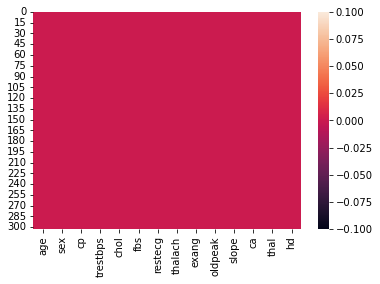

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [8]:
df['ca'].nunique()

5

In [9]:
len(df[df['thal']== '?'])

2

In [10]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [11]:
sf=df[(df['ca'] != '?') & (df['thal'] != '?')]

In [12]:
sf.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [13]:
sf['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [14]:
X=sf.drop('hd',axis=1).copy()
y=sf['hd'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
sf['cp'].unique()

array([1., 4., 3., 2.])

In [17]:
sf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [18]:
#one hot encoding for the chest pain column
pd.get_dummies(sf,columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,1,0,0


In [42]:
sf_encoded=pd.get_dummies(sf,columns=['cp','restecg','slope','thal'])
sf_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,hd,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [43]:
sf_encoded['hd'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [37]:
def func(x):
    if x>0:
        return 1
    else:
        return x

In [44]:
sf_encoded['hd']=sf_encoded['hd'].apply(func)

In [46]:
sf_encoded['hd'].unique()

array([0, 1], dtype=int64)

In [47]:
########### TRAIN TEST SPLIT  #################
X=sf_encoded.drop('hd',axis=1)
y=sf_encoded['hd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
from sklearn import tree

[Text(429.8722826086956, 389.1681818181818, 'ca <= 0.5\ngini = 0.497\nsamples = 198\nvalue = [107, 91]\nclass = No HD'),
 Text(218.3478260869565, 352.1045454545455, 'slope_3.0 <= 0.5\ngini = 0.345\nsamples = 113\nvalue = [88, 25]\nclass = No HD'),
 Text(145.56521739130434, 315.04090909090905, 'age <= 51.5\ngini = 0.498\nsamples = 36\nvalue = [17, 19]\nclass = Yes HD'),
 Text(72.78260869565217, 277.97727272727275, 'cp_3.0 <= 0.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13]\nclass = Yes HD'),
 Text(36.391304347826086, 240.91363636363636, 'trestbps <= 115.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No HD'),
 Text(18.195652173913043, 203.85, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes HD'),
 Text(54.586956521739125, 203.85, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No HD'),
 Text(109.17391304347825, 240.91363636363636, 'trestbps <= 115.0\ngini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = Yes HD'),
 Text(90.97826086956522, 203.85, 'chol <= 191.5\ngini = 0.444\n

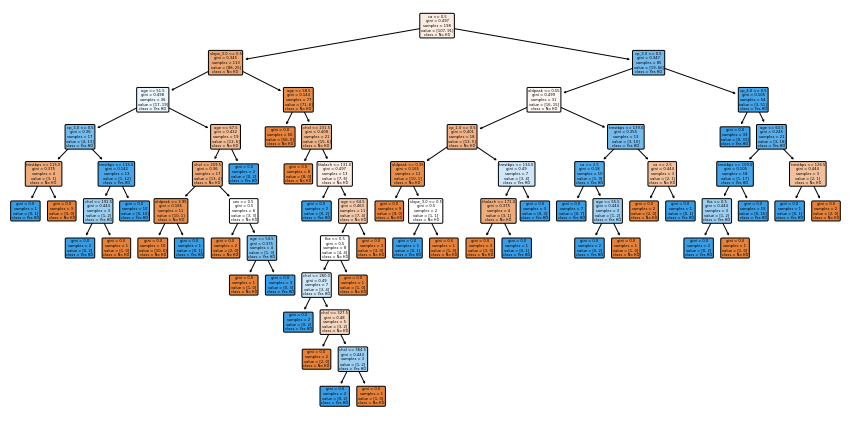

In [55]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=sf_encoded.columns)

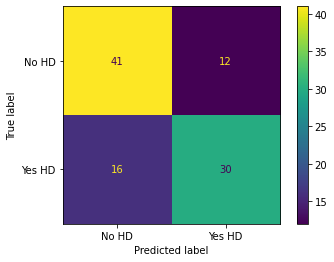

In [56]:
plot_confusion_matrix(clf,X_test,y_test,display_labels=['No HD','Has a HD'])

In [76]:
### COST complexity pruning
path=clf.cost_complexity_pruning_path(X_train,y_train)  # determine the values of alpha
ccp_alphas= path.ccp_alphas # extract different values of alpha
ccp_alphas=ccp_alphas[:-1] #Excludes the max value of alpha.


In [77]:
clf_dts=[]
for alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)
    

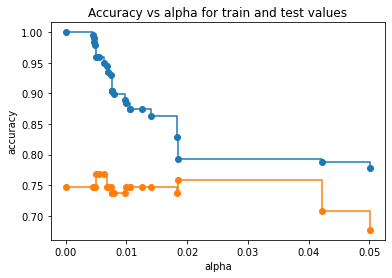

In [81]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig, axis= plt.subplots()
axis.set_xlabel('alpha')
axis.set_ylabel('accuracy')
axis.set_title('Accuracy vs alpha for train and test values')

axis.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
axis.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
axis.legend
plt.show()

In [82]:
# Fromt the graph above it look like the best value of alpha=0.016

<AxesSubplot:xlabel='tree'>

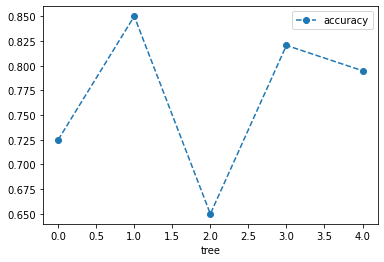

In [85]:
clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=.016)
#now using 5 fold cross validation to create 5 different training and testing dataset
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
df=pd.DataFrame({'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [86]:
#the graph above shows that using different training and testing data with the same alpha value, resulted in different
#accuracies ie alpha is sensitive to the datasets.

In [88]:
#creating an array to store the results of each fold during cross validation
alpha_loop_values=[]
# for each candidate value of alpha we will run 5 fold cross validation
# Then we store the mean and std dev of the scores for each call

for alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([alpha,np.mean(scores),np.std(scores)])


<AxesSubplot:xlabel='alpha'>

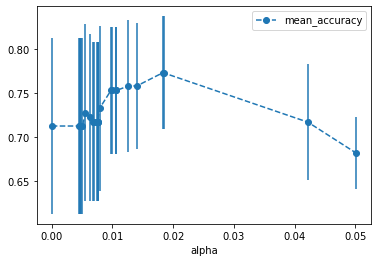

In [92]:
#Now we can draw a graph pf the means and std deviations of the scores
#for each candidate value of alpha
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','Std deviation'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='Std deviation',marker='o',linestyle='--')


In [107]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>.014) & (alpha_results['alpha']<.0184)]['alpha']

In [108]:
ideal_ccp_alpha

21    0.018264
Name: alpha, dtype: float64

In [109]:
ideal_ccp_alpha=float(ideal_ccp_alpha)

In [110]:
# now we have an ideal value of alpha

In [111]:
clf_dt_pruned=DecisionTreeClassifier(random_state=0,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.018263995302178995, random_state=0)

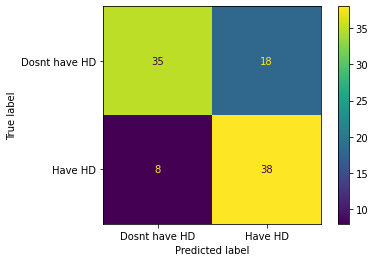

In [113]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=['Dosnt have HD','Have HD'])

[Text(418.5, 356.7375, 'ca <= 0.5\ngini = 0.497\nsamples = 198\nvalue = [107, 91]\nclass = No HD'),
 Text(209.25, 254.8125, 'slope_3.0 <= 0.5\ngini = 0.345\nsamples = 113\nvalue = [88, 25]\nclass = No HD'),
 Text(104.625, 152.8875, 'gini = 0.498\nsamples = 36\nvalue = [17, 19]\nclass = Yes HD'),
 Text(313.875, 152.8875, 'gini = 0.144\nsamples = 77\nvalue = [71, 6]\nclass = No HD'),
 Text(627.75, 254.8125, 'cp_3.0 <= 0.5\ngini = 0.347\nsamples = 85\nvalue = [19, 66]\nclass = Yes HD'),
 Text(523.125, 152.8875, 'oldpeak <= 0.55\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No HD'),
 Text(418.5, 50.96249999999998, 'gini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = No HD'),
 Text(627.75, 50.96249999999998, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = Yes HD'),
 Text(732.375, 152.8875, 'gini = 0.105\nsamples = 54\nvalue = [3, 51]\nclass = Yes HD')]

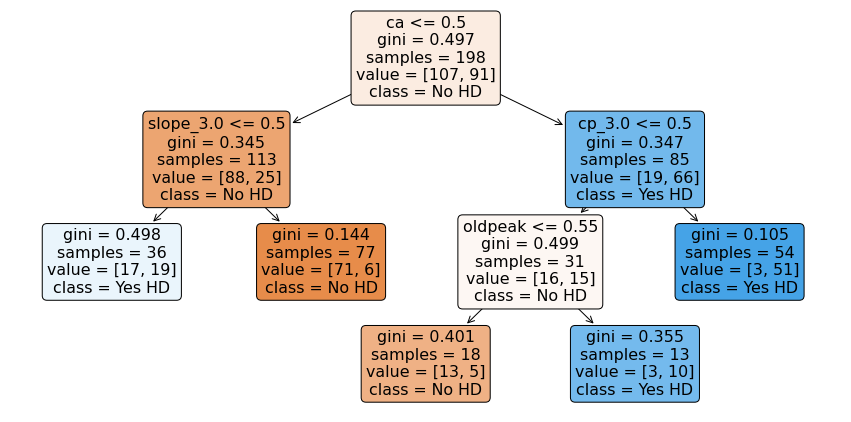

In [114]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=sf_encoded.columns)